In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Service 1

In [69]:
# Load your data
service1_df = pd.read_csv('../../results/Service1.csv')

# Select the features and target variable
X = service1_df[['cpu_allocated', 'memory_allocated', 'latency_ms']]  # Features
y = service1_df[['cpu_usage_pct', 'memory_usage_pct']]  # Multi-output target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrap the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [70]:
# Predict
y_pred = multi_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print(f'Mean Absolute Error (CPU, Mem): {mae}')
print(f'Mean Squared Error (CPU, Mem): {mse}')
print(f'R-squared (CPU, Mem): {r2}')

Mean Absolute Error (CPU, Mem): [0.0067558 0.0054299]
Mean Squared Error (CPU, Mem): [0.00012397 0.0001222 ]
R-squared (CPU, Mem): [0.99999993 0.99999964]


In [56]:
# Plotting function
def plot_true_vs_pred(y_test, y_pred, labels):
    for i, label in enumerate(labels):
        plt.figure()
        plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6)
        plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 '--k', lw=2)
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.title(f'True vs Predicted - {label}')
        plt.grid(True)
        plt.show()

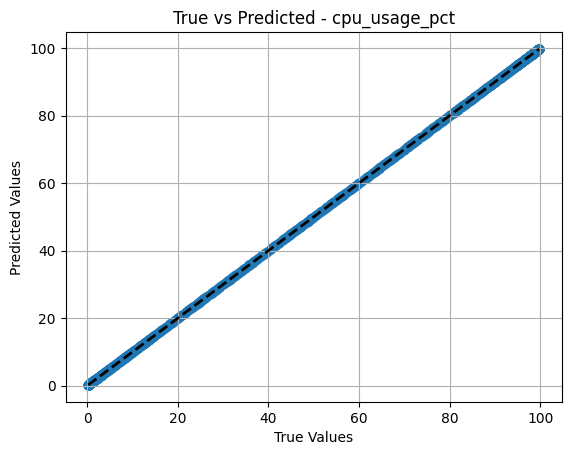

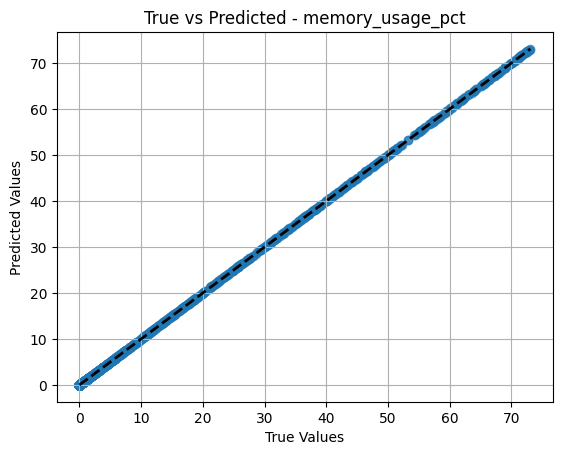

In [57]:
# Call the plotting function
plot_true_vs_pred(y_test, y_pred, labels=y.columns)

In [71]:
from sklearn.model_selection import GridSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10]
}

# Wrap the base estimator
base_rf = RandomForestRegressor(random_state=42)
multi_rf = MultiOutputRegressor(base_rf)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=multi_rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2
)

In [72]:
# Fit
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Best Parameters:", grid_search.best_params_)
print("Mean Absolute Error (CPU, Mem):", mae)
print("Mean Squared Error (CPU, Mem):", mse)
print("R-squared (CPU, Mem):", r2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Mean Absolute Error (CPU, Mem): [0.00658735 0.00532335]
Mean Squared Error (CPU, Mem): [0.00011611 0.00011716]
R-squared (CPU, Mem): [0.99999993 0.99999965]


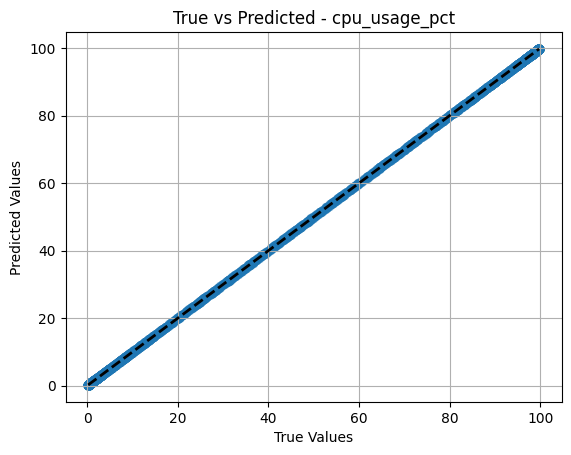

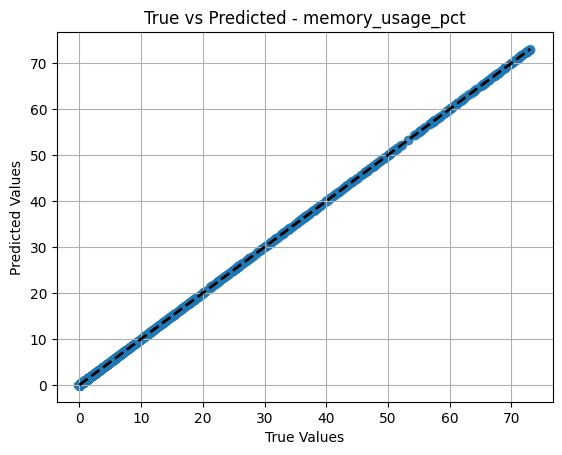

In [73]:
# Call the plotting function
plot_true_vs_pred(y_test, y_pred, labels=y.columns)

Service 2

In [75]:
# Load your data
service2_df = pd.read_csv('../../results/Service2.csv')

# Select the features and target variable
X = service2_df[['cpu_allocated', 'memory_allocated', 'latency_ms']]  # Features
y = service2_df[['cpu_usage_pct', 'memory_usage_pct']]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrap the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [76]:
# Predict
y_pred = multi_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print(f'Mean Absolute Error (CPU, Mem): {mae}')
print(f'Mean Squared Error (CPU, Mem): {mse}')
print(f'R-squared (CPU, Mem): {r2}')

Mean Absolute Error (CPU, Mem): [0.0069214 0.0051627]
Mean Squared Error (CPU, Mem): [0.00012665 0.00011146]
R-squared (CPU, Mem): [0.99999992 0.99999967]


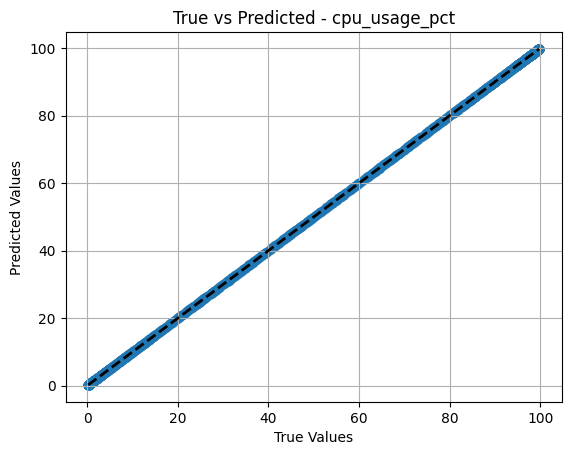

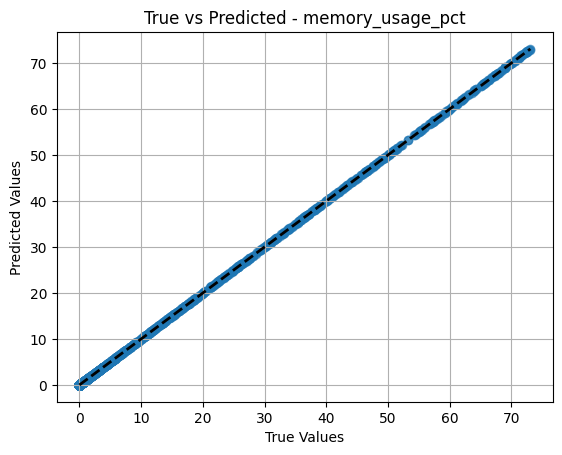

In [77]:
# Call the plotting function
plot_true_vs_pred(y_test, y_pred, labels=y.columns)

In [78]:
from sklearn.model_selection import GridSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10]
}

# Wrap the base estimator
base_rf = RandomForestRegressor(random_state=42)
multi_rf = MultiOutputRegressor(base_rf)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=multi_rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2
)

In [79]:
# Fit
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Best Parameters:", grid_search.best_params_)
print("Mean Absolute Error (CPU, Mem):", mae)
print("Mean Squared Error (CPU, Mem):", mse)
print("R-squared (CPU, Mem):", r2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Mean Absolute Error (CPU, Mem): [0.00679565 0.00508207]
Mean Squared Error (CPU, Mem): [0.00012073 0.0001082 ]
R-squared (CPU, Mem): [0.99999993 0.99999968]


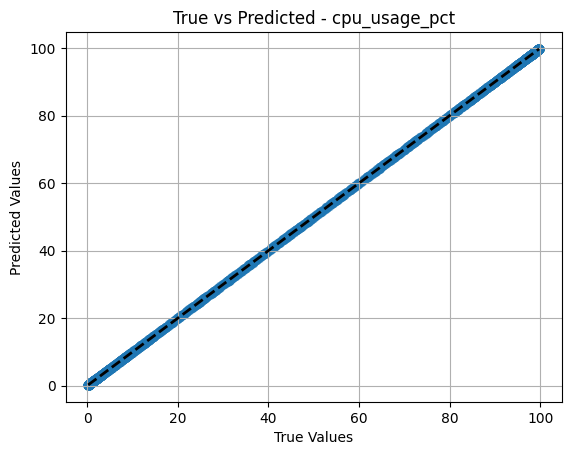

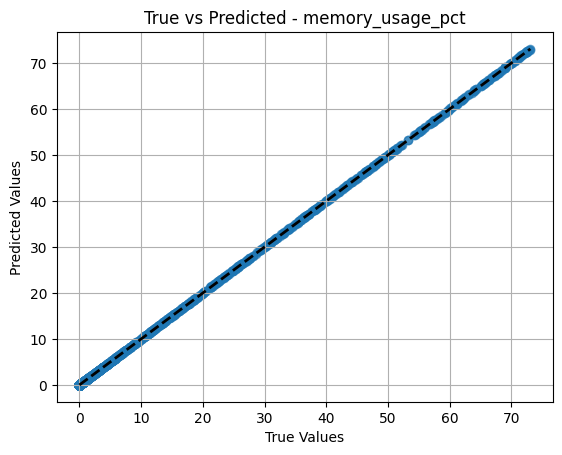

In [80]:
# Call the plotting function
plot_true_vs_pred(y_test, y_pred, labels=y.columns)